# Working and Exploration

In [1]:
# Retrieve the completed working dataframes for analysis
%store -r sales_df stock_df customer_reviews_df customers_df states_df

# Libraries For file handling and dataframes
import os
import json
from IPython.display import display
import pandas as pd 

# Libraries for maths, plots
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Other Libraries
import math
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stuartgow/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Analysis & Visualisation

## To Do

- Geographic Analysis
    - customers distribution
    - sales count and value distribution
    - correlation with shop locations, state population
    - ??  a good plot to show the relationship eg sales per state (line + bar?)
    - ?? scatter and regression line
    - map plot to visualise
    - highlight states with weakest sales, customers

- Customers
    - by age bands eg under 25, 24 to 40 etc
    - sales counts and value
    - bar chart to visualise

- Sales, Brands, Geography
    - Which are most & least sold, by count and value
    - Are low sales linked to anything such as state, age of customer etc
    - ?? anything in the bought with, eg more sales this way?
    - Sales by brand, any patterns 

- Prices
    - prices distribution
    - box plot to show spread, outliers
    - possibly a bar plot
    - stock price vs sales price comparison
    - how many are discounted vs not
    - which are most discounted, does this equate to higher sales etc

- Reviews
    - any messages from the reviews?
    - any interpretation possible?
    - links to brand?
    - anything else like age, geography ...
    - ?? sales probably not linked to reviews, unless I suppose reviews are submitted at a later date
    - ?? follow on sales for a customer?
    - wordcloud from reviews


- Sentiment analysis
- Geographic mapping
- Sales effectiveness?
- Demographics?


## Customer Reviews Ranking

All customer reviews consist of descriptive text and a score, it appears that the score is a ranking from poor to good (1 to 5). Looking at the customer ranking scores there was a very even distribution of the scores which is unexpected. To try to understnad the reviews better, a sentiment analysis was completed on the descriptive text for all reviews and then used to generate a 1 to 5 sentiment ranking. 

The ranking produced from sentiment analysis were generally very positive which seems unusual; however, a manual examination of several reviews did support this as a very large number do have positive text. So this generated ranking was retained for comparisons.

The difference between customer rankings and sentiment rankings was then compared to get a sense of the accuracy of the customer rankings. The bar plot below  shows that nearly 50% of the 39,000 reviews had significantly different rankings and that the rankings given by customers were generally much more conservative than the sentiment expressed in the the actual text. A manual spot-check of several customer reviews was carried out to better understand this issue. The reason for the big difference is that a very signifiant number of customers have interpreted the ranking in the opposite way, ie good to bad (1 to 5).

!! Actions
- Retain and use the generated ranking for further analysis ***save in the customer df***
- Changes to the customer review system to ensure the ranking approach is clear
- Possibly even do initial sentiment analysis and flag to customer if seems inconsistent with text

***double-check this using the average product rating***


In [2]:
# Sentiment analysis of reviews

#import nltk
#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#  Simple function to categorise sentiment to create a ranking score similar to customer reviews
def sentiment_categorise(sentiment):
    # Uses the sentiment compound score defined as +ve >= 0.05, -ve <=-0.5, neutral in between
    # Set the 1 to 5 score
    if sentiment <= -0.5:
        return 1
    elif sentiment <= -0.05:
        return 2
    elif sentiment < 0.05:
        return 3
    elif sentiment < 0.5:
        return 4
    else:
        return 5
    '''
    if sentiment <= 0:
        return 1
    elif sentiment <= 0.5:
        return 2
    elif sentiment < 0.6:
        return 3
    elif sentiment < 0.90:
        return 4
    else:
        return 5
    '''
    
# Obtain the sentiment, compound score (-1 to 1) for each review
temp_customer_reviews = customer_reviews_df.copy()
sentiment_compound_scores = [analyser.polarity_scores(review_text)['compound'] for review_text in temp_customer_reviews['review_text']]

# Classify the sentiments to align to the review score ranking 1 to 5 and put into the temporary DF
temp_customer_reviews['sentiment_review_score'] = [sentiment_categorise(x) for x in sentiment_compound_scores]
temp_customer_reviews['sentiment_compound_score'] = sentiment_compound_scores
temp_customer_reviews['review_score'] = temp_customer_reviews['review_score'].astype(int)



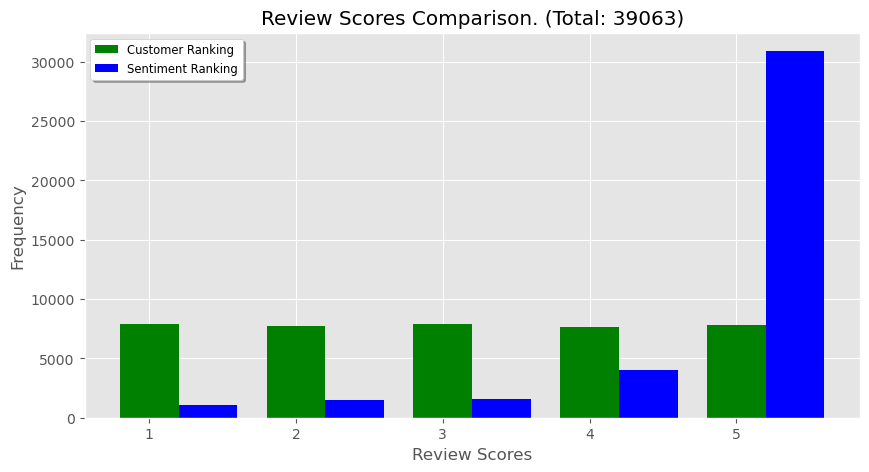

In [5]:
# Compare the review rankings for customers compared to the sentiment analysis

rank_count_cust = temp_customer_reviews['review_score'].value_counts()
rank_count_sent = temp_customer_reviews['sentiment_review_score'].value_counts()
#display(rank_count_cust, rank_count_sent)

fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Review Scores Comparison. (Total: {len(temp_customer_reviews['review_score'])})')
ax.set_xlabel('Review Scores')
ax.set_ylabel('Frequency')
bar_width = 0.4

columnsC = rank_count_cust.index
columnsS = [x + bar_width for x in rank_count_sent.index]

barsC = ax.bar(columnsC, rank_count_cust, color='green', width=bar_width, label='Customer Ranking')
barsS = ax.bar(columnsS, rank_count_sent, color='blue', width=bar_width, label='Sentiment Ranking')
ax.legend(fontsize='small', loc='upper left', shadow=True, facecolor='white')
plt.show()

# Tidy Up
del rank_count_cust, rank_count_sent, columnsC, columnsS

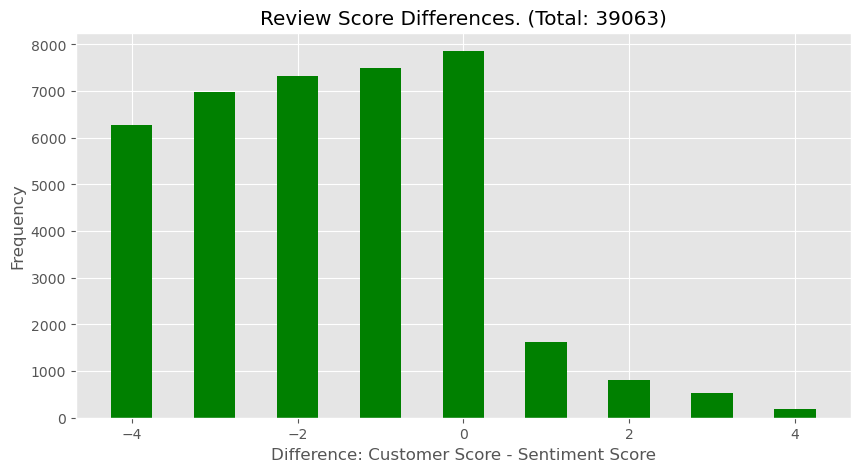

In [ ]:
# Compare the customer review rankings with the sentiment analysis
# Calculate the frequency of differences
score_differences = temp_customer_reviews['review_score'] - temp_customer_reviews['sentiment_review_score']
differences_frequency = score_differences.value_counts()
#display(differences_frequency)

# Plot the frequencies
fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Review Score Differences. (Total: {len(score_differences)})')
ax.set_xlabel('Difference: Customer Score - Sentiment Score')
ax.set_ylabel('Frequency')
bars = ax.bar(differences_frequency.index, differences_frequency, color='green', width=0.5)
plt.show()

# Tidy Up
del analyser, sentiment_compound_scores, score_differences, differences_frequency
# temp_customer_reviews, 

# Snippets

In [ ]:
fig = plt.figure(figsize =(5, 5))
plt.boxplot(DATA['windspeed'])
plt.show

In [ ]:
# Scatter plots for bike hires to weather conditions

plt.scatter(DATA['temp'],bike_hires, label= 'Temp', color = 'g', s = 10)
plt.scatter(DATA['windspeed'], bike_hires, label= 'Windspeed', color = 'b', s= 5)
plt.scatter(DATA['hum'], bike_hires, label= 'Humidity', color = 'r', s = 5)

plt.title('Scatter Plot of Count vs ...')
plt.xlabel('Scaled Weather')
plt.ylabel('Total Bike Hires')
plt.legend(fontsize='small', loc='upper right')
plt.show

# Quick correlation check to see
data_subset = pd.DataFrame(DATA, columns = ['cnt','temp', 'windspeed', 'hum'])
data_subset.corr().abs()[['cnt']]

# Quick look at regression line for temperature 

import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = DATA['temp']
y = DATA['cnt']
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line_description = (f'Regression Line: y = {intercept:,.2f}, slope = {slope:,.3f}, pearsons = {r:,.3f}, pvalue = {p:.12f}, stderr = {stderr:,.3f}')
print(line_description)

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title('Linear Regression Line Fit')
ax.set_xlabel('Temperature')
ax.set_ylabel('Hires')

#ax.plot(x, y, label='Data Points - Temp', color = 'g')
ax.scatter(x, y, label= 'Data Points - Temp', color = 'g', s = 10)

ax.plot(x, intercept + slope * x, label=line_description)
ax.legend(fontsize='small', loc='upper left', shadow=True, facecolor='white')

plt.show()

In [ ]:


x = temp_customer_reviews['review_score'].astype(int)
y = temp_customer_reviews['sentiment_review_score']

differences = y - x
counts = differences.value_counts()


fig, ax = plt.subplots(figsize =(5, 5))
ax.set_title('Differences xx')
ax.set_xlabel('Ranking')
ax.set_ylabel('Count')

bars = ax.bar(counts.index, counts, color='green', width=0.5)

plt.show()


'''

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(temp_customer_reviews[['review_score', 'sentiment_review_score']], annot=True, cmap='coolwarm')
plt.title('Heatmap of Differences Between Columns')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_customer_reviews.index, x, label='Column 1')
plt.plot(temp_customer_reviews.index, y, label='Column 2')
plt.legend()
plt.title('Line Plot Comparison of Two Columns')
plt.show()

'''

# Compare the customer rankings with the rankings derived from the sentiment analyse

import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)


# Scatter plot of the two types of review ranking
fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title('Linear Regression Line Fit')
ax.set_xlabel('Review Ranking')
ax.set_ylabel('Sentiment Review Ranking')

ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='temp')
ax.legend(fontsize='small', loc='upper left', shadow=True, facecolor='white')

plt.show()




In [ ]:
# Sentiment analysis of reviews

#import nltk
#nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#  Simple function to categorise sentiment to create a ranking score similar to customer reviews
def sentiment_categorise(sentiment):
    # Uses the setiment compiund score +ve >= 0.05, -ve <=-0.5, neutral in between
    # Set the 1 to 5 score as 1, 3 or 5 for -ve, neutral, +ve 
    if sentiment <= -0.05:
        return 1
    elif sentiment < 0.05:
        return 3
    else:
        return 5


# Prepare the review text for sentiment anlalysis

# Remove special punctuation

# Text to lower case

# Spell check

# Word tokenisation
from nltk.tokenize import word_tokenize
text = "Sentiment analysis is a fascinating field."
tokens = word_tokenize(text)
print(tokens)

review_sentiments = [analyser.polarity_scores(review_text)['compound'] for review_text in customer_reviews_df['review_text']]
customer_reviews_df['sentimentC'] = [sentiment_categorise(x) for x in review_sentiments]
customer_reviews_df['sentiment'] = review_sentiments

# TODO: Appears to be an inconsistent use of score, some appear to have 1 as best whilst others using 5 as best
# TODO: Classify sentiment anlaysis as good, bad, neutral or 1 3 5? Correlate/fit with score? Evidence to support above?
